##preprocessing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
training_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_features_train.csv')
testing_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_features_test.csv')

In [0]:
training_features.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [0]:
training_features.shape

(1456, 24)

In [0]:
testing_features.shape

(416, 24)

In [0]:
training_features.groupby('city').mean()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,,
iq,2005.000000,26.503846,0.263869,0.238783,0.250126,0.266779,64.245736,297.869538,299.133043,295.492982,307.082752,292.866667,57.609864,88.639117,64.245736,17.096110,9.206783,27.530933,10.566197,34.004545,21.196680,62.467262
sj,1998.826923,26.503205,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,301.398817,297.301828,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484


In [0]:
testing_features.groupby('city').mean()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,,
iq,2011.500000,26.333333,0.266889,0.270574,0.258583,0.282235,57.924615,297.760238,299.039011,295.579890,306.975641,292.717949,72.609936,89.606016,57.924615,17.214368,9.321245,27.541088,10.741861,33.961935,21.089262,34.389542
sj,2010.326923,26.503846,0.024801,0.036730,0.177055,0.153226,26.521124,299.458051,299.542968,295.322004,301.596512,297.572868,23.766279,78.203034,26.521124,16.753383,2.587043,27.272536,6.152436,31.677132,23.107364,34.212791


In [0]:
training_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


split data for two citr

In [0]:
training_features_sj = training_features[training_features['city'] == 'sj'].drop('city', 1)
training_features_iq = training_features[training_features['city'] == 'iq'].drop('city', 1)
testing_features_sj = testing_features[testing_features['city'] == 'sj'].drop('city', 1)
testing_features_iq = testing_features[testing_features['city'] == 'iq'].drop('city', 1)

In [0]:
training_features_sj.shape,testing_features_sj.shape

((936, 23), (260, 23))

In [0]:
training_features_iq.shape,testing_features_iq.shape

((520, 23), (156, 23))

In [0]:
training_features_iq.tail()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,307.8,292.3,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [0]:
training_features_iq.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [0]:
training_features_sj.tail()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
931,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,2008,16,2008-04-15,0.00180,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2
935,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3


In [0]:
training_features_sj.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
features_iq = pd.concat([training_features_iq, testing_features_iq], ignore_index=True)
features_sj = pd.concat([training_features_sj, testing_features_sj], ignore_index=True)

In [0]:
features_iq

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
1,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
2,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
3,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
4,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
672,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
673,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
674,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [0]:
features_iq.shape

(676, 23)

In [0]:
features_sj.shape

(1196, 23)

In [0]:
features_iq.isnull().sum()

year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       47
station_diur_temp_rng_c                  47
station_max_temp_c                       15
station_min_temp_c                       15
station_precip_mm               

In [0]:
features_sj.isnull().sum()

year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  234
ndvi_nw                                   60
ndvi_se                                   20
ndvi_sw                                   20
precipitation_amt_mm                      11
reanalysis_air_temp_k                      8
reanalysis_avg_temp_k                      8
reanalysis_dew_point_temp_k                8
reanalysis_max_air_temp_k                  8
reanalysis_min_air_temp_k                  8
reanalysis_precip_amt_kg_per_m2            8
reanalysis_relative_humidity_percent       8
reanalysis_sat_precip_amt_mm              11
reanalysis_specific_humidity_g_per_kg      8
reanalysis_tdtr_k                          8
station_avg_temp_c                         8
station_diur_temp_rng_c                    8
station_max_temp_c                         8
station_min_temp_c                         8
station_pr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13acfa4dd8>,
      dtype=object)

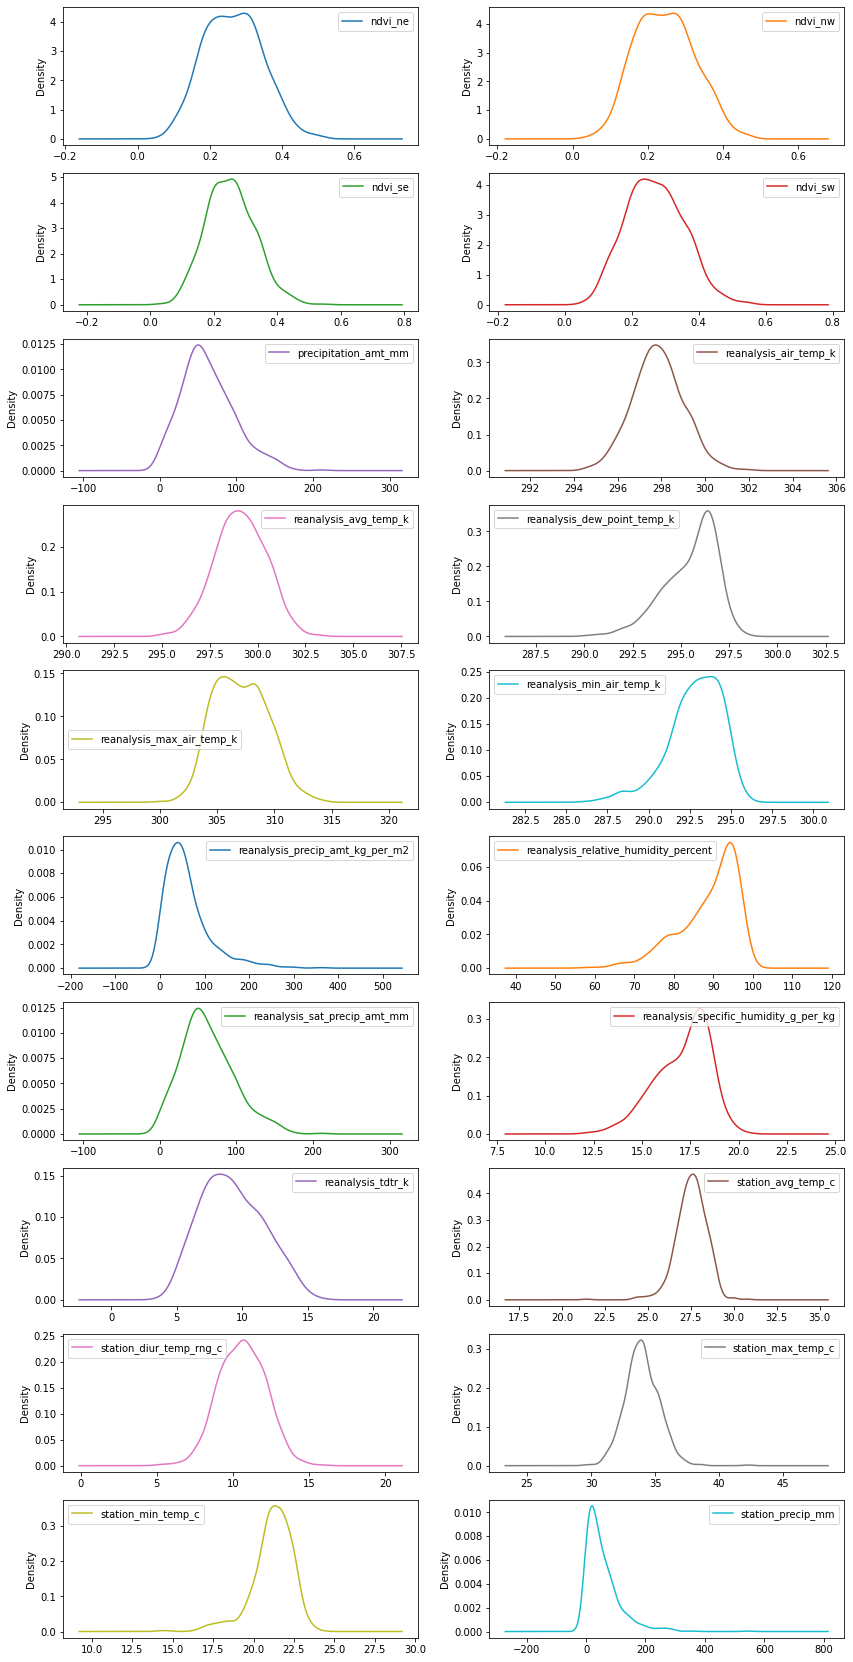

In [0]:
(features_iq.drop(['year', 'weekofyear'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(14, 30), layout=(10, 2), sharex=False))

In [0]:
features_iq

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
1,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
2,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
3,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
4,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
672,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
673,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
674,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [0]:
corr_iq = features_iq.corr()
corr_sj = features_sj.corr()

Text(0.5, 1.0, 'Iquitos correlations')

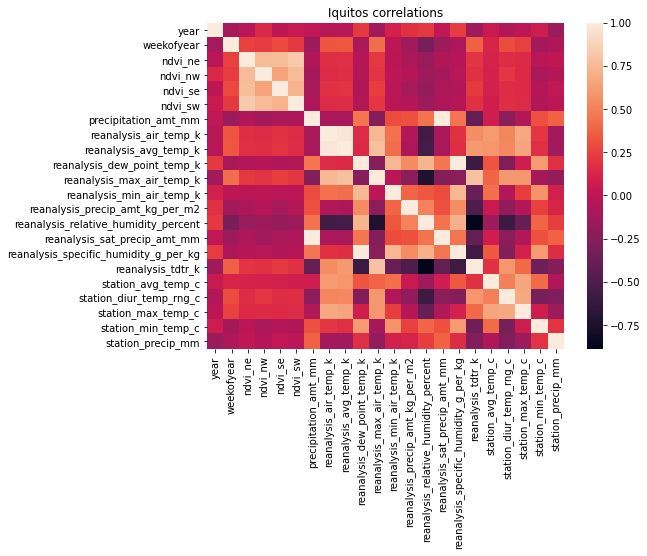

In [0]:
plt.figure(figsize=(8, 6))
corr_heatmap_iq = sns.heatmap(corr_iq)
plt.title('Iquitos correlations')

Text(0.5, 1.0, 'San Juan correlations')

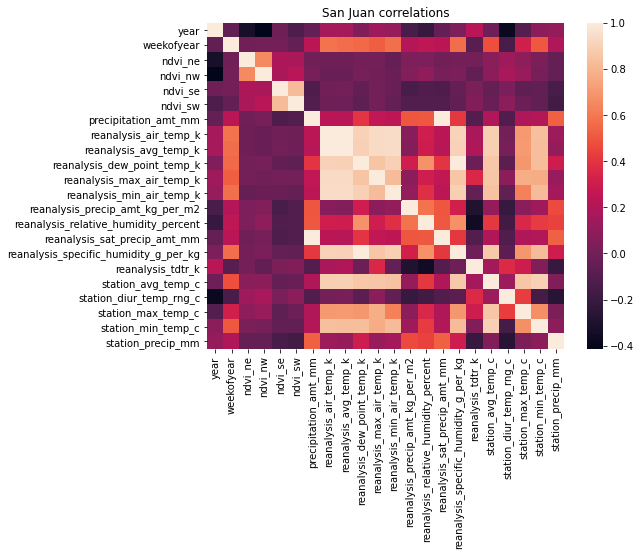

In [0]:
plt.figure(figsize=(8, 6))
corr_heatmap_sj = sns.heatmap(corr_sj)
plt.title('San Juan correlations')

In [0]:
# Select upper triangle of correlation matrix
corr_upper_iq = corr_iq.where(np.triu(np.ones(corr_iq.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop_iq = [column for column in corr_upper_iq.columns if any(corr_upper_iq[column] > 0.90) or any(corr_upper_iq[column] < -0.90)]
to_drop_iq

['reanalysis_avg_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg']

In [0]:
corr_upper_sj = corr_sj.where(np.triu(np.ones(corr_sj.shape), k=1).astype(np.bool))
to_drop_sj = [column for column in corr_upper_sj.columns if any(corr_upper_sj[column] > 0.95) or any(corr_upper_iq[column] < -0.95)]
to_drop_sj

['reanalysis_avg_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg']

In [0]:
features_iq.drop(to_drop_iq, axis=1, inplace=True)
features_sj.drop(to_drop_sj, axis=1, inplace=True)

In [0]:
features_sj.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [0]:
#drop year becuse redundunt , exiest in week of year 
features_iq.drop(['year'], axis=1, inplace=True)
features_sj.drop(['year'], axis=1, inplace=True)

In [0]:
features_sj.columns

Index(['weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

Convert all Kelvins to Celsius.


In [0]:
features_iq[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15
features_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15

Vegetation

iq cite

<Figure size 432x288 with 0 Axes>

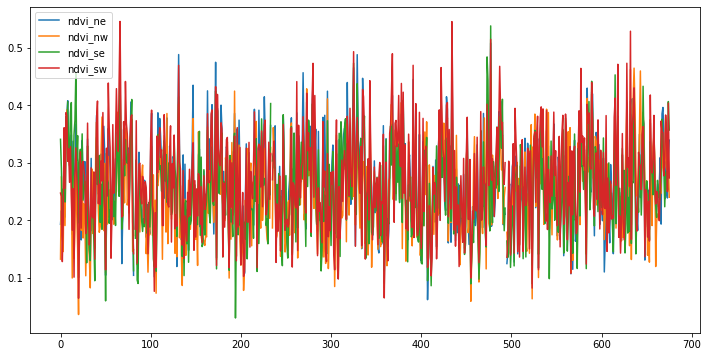

In [0]:
plt.figure()
features_iq[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(12, 6))

Similar, take the mean of them

In [0]:
features_iq['ndvi'] = features_iq[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)
features_iq.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [0]:
features_iq.shape

(676, 16)

sj cite

In [0]:
features_sj.shape

(1196, 19)

<Figure size 432x288 with 0 Axes>

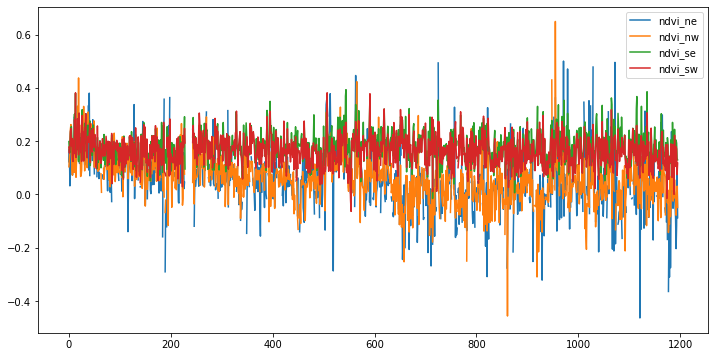

In [0]:
plt.figure()
features_sj[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(12, 6))

In [0]:
features_sj['ndvi_n'] = features_sj[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
features_sj['ndvi_s'] = features_sj[['ndvi_se', 'ndvi_sw']].mean(axis=1)
features_sj.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [0]:
features_sj.shape

(1196, 17)

reanalysis

iq cite

<Figure size 432x288 with 0 Axes>

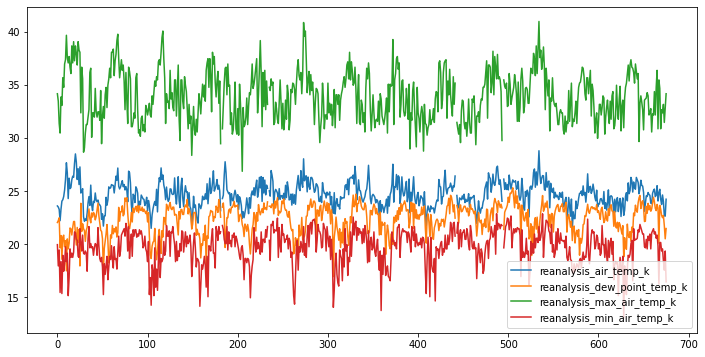

In [0]:
plt.figure()
features_iq[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']].plot(figsize=(12, 6))

In [0]:
features_iq.shape

(676, 16)

sj cite

<Figure size 432x288 with 0 Axes>

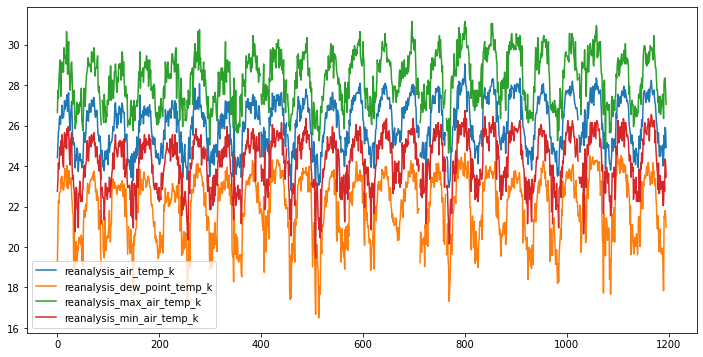

In [0]:
plt.figure()
features_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']].plot(figsize=(12, 6))

In [0]:
features_sj['reanalysis_temp'] = features_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
                                              'reanalysis_min_air_temp_k']].mean(axis=1)


In [0]:
features_sj.drop(['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'],
                 axis=1, inplace=True)

In [0]:
 features_sj.shape

(1196, 14)

Temperature

iq cite

<Figure size 432x288 with 0 Axes>

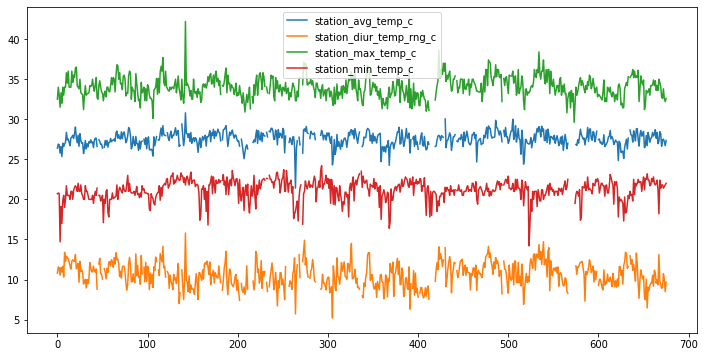

In [0]:
plt.figure()
features_iq[['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c']].plot(figsize=(12, 6))

In [0]:
features_iq[['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c']].isnull().sum()

station_avg_temp_c         47
station_diur_temp_rng_c    47
station_max_temp_c         15
station_min_temp_c         15
dtype: int64

In [0]:
features_iq['station_temp'] = features_iq[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].interpolate().mean(axis=1)
features_iq.shape

(676, 17)

In [0]:
features_iq.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)

In [0]:
features_iq.shape

(676, 13)

sj cite

<Figure size 432x288 with 0 Axes>

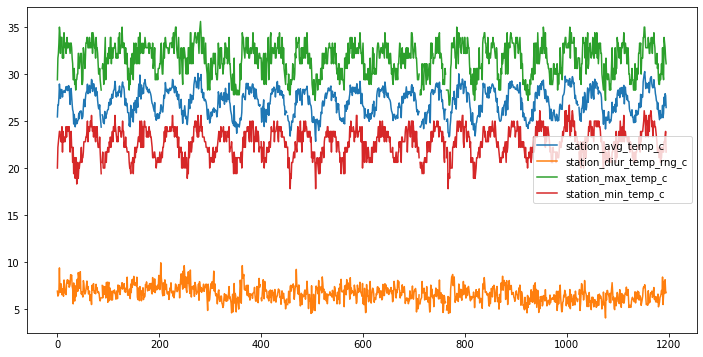

In [0]:
plt.figure()
features_sj[['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c']].plot(figsize=(12,6))

In [0]:
features_sj[['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c']].isnull().sum()

station_avg_temp_c         8
station_diur_temp_rng_c    8
station_max_temp_c         8
station_min_temp_c         8
dtype: int64

In [0]:
features_sj['station_temp'] = features_sj[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].interpolate().mean(axis=1)
features_sj.shape

(1196, 15)

In [0]:
features_sj.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)
features_sj.shape

(1196, 11)

data column

In [0]:
features_iq.columns

Index(['weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_precip_mm', 'ndvi'],
      dtype='object')

In [0]:
features_iq.shape

(676, 12)

In [0]:
features_sj.columns

Index(['weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_precip_mm', 'ndvi_n', 'ndvi_s', 'reanalysis_temp',
       'station_temp'],
      dtype='object')

In [0]:
features_sj.shape

(1196, 11)

save the data clean in new csv file 

In [0]:
features_iq.to_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-features-iq.csv', index=False)
features_sj.to_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-features-sj.csv', index=False)

In [0]:
features_iq

,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_precip_mm,ndvi,station_temp
0,26,2000-07-01,25.41,23.590000,22.034286,34.15,19.95,43.19,92.418571,8.928571,3.0,0.228307,26.533333
1,27,2000-07-08,60.61,23.484286,22.208571,33.45,17.95,46.00,93.581429,10.314286,55.6,0.256012,27.233333
2,28,2000-07-15,55.52,23.265714,22.472857,31.35,19.45,64.77,95.848571,7.385714,38.1,0.170504,26.833333
3,29,2000-07-22,5.60,22.207143,19.647143,30.45,15.45,23.96,87.234286,9.114286,30.0,0.206918,23.988889
4,30,2000-07-29,62.76,23.282857,20.807143,33.85,18.35,31.80,88.161429,9.500000,4.0,0.316546,26.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,22,2013-05-28,41.12,24.624286,22.488571,32.35,19.55,67.60,89.990000,10.100000,33.0,0.336329,27.266667
672,23,2013-06-04,71.52,24.017143,22.695714,33.15,18.45,45.70,93.891429,9.657143,68.0,0.294918,27.573333
673,24,2013-06-11,78.96,22.681429,21.744286,31.45,17.55,45.22,94.967143,7.385714,93.2,0.248029,27.133333
674,25,2013-06-18,39.54,22.628571,20.498571,32.75,19.35,4.70,89.057143,8.228571,34.1,0.355921,26.900000


In [0]:
training_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_labels_train.csv')

In [0]:
test_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/submission_format.csv')

In [0]:
training_label.shape,test_label.shape

((1456, 4), (416, 4))

In [0]:
training_label.drop(['year'], axis=1, inplace=True)

In [0]:
test_label.drop(['year'], axis=1, inplace=True)

In [0]:
training_label.head(5)

,city,weekofyear,total_cases
0,sj,18,4
1,sj,19,5
2,sj,20,4
3,sj,21,3
4,sj,22,6


In [0]:
training_label['week_start_date'] = training_features['week_start_date']
test_label['week_start_date'] = testing_features['week_start_date']

In [0]:
training_label_sj = training_label[training_label['city'] == 'sj'].drop('city', 1)
training_label_iq = training_label[training_label['city'] == 'iq'].drop('city', 1)

In [0]:
testing_label_sj = test_label[test_label['city'] == 'sj'].drop('city', 1)
testing_label_iq = test_label[test_label['city'] == 'iq'].drop('city', 1)


In [0]:
training_features_sj.shape,features_sj.shape

((936, 23), (1196, 11))

In [0]:
label_iq = pd.concat([training_label_iq,testing_label_iq])
label_sj = pd.concat([training_features_sj, testing_label_sj])

In [0]:
label_iq.shape,features_iq.shape

((676, 3), (676, 12))

In [0]:
label_sj.shape,features_sj.shape

((1196, 24), (1196, 11))

In [0]:
features_iq.columns

Index(['weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_precip_mm', 'ndvi'],
      dtype='object')

In [0]:
label_iq.columns

Index(['weekofyear', 'total_cases', 'week_start_date'], dtype='object')

In [0]:
training_label

,city,weekofyear,total_cases,week_start_date
0,sj,18,4,1990-04-30
1,sj,19,5,1990-05-07
2,sj,20,4,1990-05-14
3,sj,21,3,1990-05-21
4,sj,22,6,1990-05-28
...,...,...,...,...
1451,iq,21,5,2010-05-28
1452,iq,22,8,2010-06-04
1453,iq,23,1,2010-06-11
1454,iq,24,1,2010-06-18


In [0]:
training_label_iq.isnull().sum()

weekofyear         0
total_cases        0
week_start_date    0
dtype: int64

In [0]:
training_label_sj.isnull().sum()

weekofyear         0
total_cases        0
week_start_date    0
dtype: int64

In [0]:
training_label_iq

,weekofyear,total_cases,week_start_date
936,26,0,2000-07-01
937,27,0,2000-07-08
938,28,0,2000-07-15
939,29,0,2000-07-22
940,30,0,2000-07-29
...,...,...,...
1451,21,5,2010-05-28
1452,22,8,2010-06-04
1453,23,1,2010-06-11
1454,24,1,2010-06-18


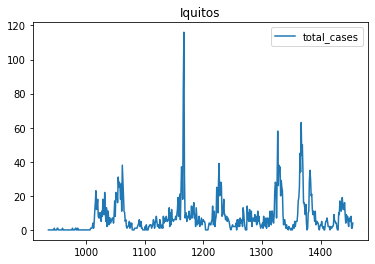

In [0]:
training_label_iq.drop(['weekofyear'], axis=1).plot(title="Iquitos")

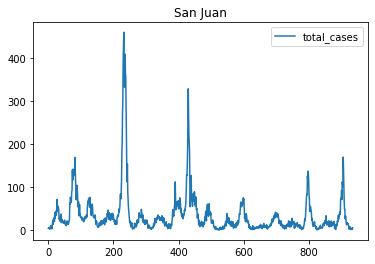

In [0]:
training_label_sj.drop(['weekofyear'], axis=1).plot(title="San Juan")

In [0]:
training_label_iq.to_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)//1-labels-train-iq.csv', index=False)
training_label_sj.to_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)//1-labels-train-sj.csv', index=False)

In [0]:
training_label_iq.shape

(520, 3)

In [0]:
d=pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-labels-train-iq.csv')

In [0]:
d.shape

(520, 3)

##missing-value

In [0]:
iq_FC = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-features-iq.csv', 
                         parse_dates=['week_start_date'], index_col='week_start_date')

In [0]:
sj_FC = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-features-sj.csv', 
                         parse_dates=['week_start_date'], index_col='week_start_date')

In [0]:
iq_FC.shape

(676, 12)

In [0]:
sj_FC.shape

(1196, 10)

In [0]:
iq_FC.head(5)

,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_precip_mm,ndvi,station_temp
week_start_date,,,,,,,,,,,,
2000-07-01,26,25.41,23.590000,22.034286,34.15,19.95,43.19,92.418571,8.928571,3.0,0.228307,26.533333
2000-07-08,27,60.61,23.484286,22.208571,33.45,17.95,46.00,93.581429,10.314286,55.6,0.256012,27.233333
2000-07-15,28,55.52,23.265714,22.472857,31.35,19.45,64.77,95.848571,7.385714,38.1,0.170504,26.833333
2000-07-22,29,5.60,22.207143,19.647143,30.45,15.45,23.96,87.234286,9.114286,30.0,0.206918,23.988889
2000-07-29,30,62.76,23.282857,20.807143,33.85,18.35,31.80,88.161429,9.500000,4.0,0.316546,26.333333


In [0]:
sj_FC.tail(5)

,weekofyear,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_precip_mm,ndvi_n,ndvi_s,reanalysis_temp,station_temp
week_start_date,,,,,,,,,,
2013-03-26,13,30.34,2.55,78.780000,3.314286,3.5,-0.051792,0.130764,24.611429,28.080952
2013-04-02,14,6.55,64.30,81.650000,2.828571,17.6,-0.140542,0.191543,24.366071,27.580952
2013-04-09,15,0.00,0.70,78.285714,3.171429,9.4,-0.062900,0.181564,25.101429,28.004762
2013-04-16,16,0.00,1.40,77.674286,3.042857,22.9,0.056975,0.104936,24.797857,27.776190
2013-04-23,17,45.47,19.90,79.045714,2.342857,47.5,-0.067983,0.123743,24.100000,26.414286


Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [0]:
iq_FC.isnull().sum()

weekofyear                               0
precipitation_amt_mm                     4
reanalysis_air_temp_k                    4
reanalysis_dew_point_temp_k              4
reanalysis_max_air_temp_k                4
reanalysis_min_air_temp_k                4
reanalysis_precip_amt_kg_per_m2          4
reanalysis_relative_humidity_percent     4
reanalysis_tdtr_k                        4
station_precip_mm                       19
ndvi                                     3
station_temp                             0
dtype: int64

In [0]:
fetures_iq_i1 = iq_FC.interpolate().drop(['weekofyear'], axis=1)
features_sj_i1 = sj_FC.interpolate().drop(['weekofyear'], axis=1)

In [0]:
fetures_iq_i1.isnull().sum()

precipitation_amt_mm                    0
reanalysis_air_temp_k                   0
reanalysis_dew_point_temp_k             0
reanalysis_max_air_temp_k               0
reanalysis_min_air_temp_k               0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_tdtr_k                       0
station_precip_mm                       0
ndvi                                    0
station_temp                            0
dtype: int64

In [0]:
features_sj_i1.isnull().sum()

precipitation_amt_mm                    0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_tdtr_k                       0
station_precip_mm                       0
ndvi_n                                  0
ndvi_s                                  0
reanalysis_temp                         0
station_temp                            0
dtype: int64

In [0]:
iq_FC.columns,iq_FC.shape

(Index(['weekofyear', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
        'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
        'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
        'station_precip_mm', 'ndvi', 'station_temp'],
       dtype='object'), (676, 12))

In [0]:
fetures_iq_i1.columns,fetures_iq_i1.shape

(Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
        'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
        'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
        'station_precip_mm', 'ndvi', 'station_temp'],
       dtype='object'), (676, 11))

In [0]:
fetures_iq_i1

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_precip_mm,ndvi,station_temp
week_start_date,,,,,,,,,,,
2000-07-01,25.41,23.590000,22.034286,34.15,19.95,43.19,92.418571,8.928571,3.0,0.228307,26.533333
2000-07-08,60.61,23.484286,22.208571,33.45,17.95,46.00,93.581429,10.314286,55.6,0.256012,27.233333
2000-07-15,55.52,23.265714,22.472857,31.35,19.45,64.77,95.848571,7.385714,38.1,0.170504,26.833333
2000-07-22,5.60,22.207143,19.647143,30.45,15.45,23.96,87.234286,9.114286,30.0,0.206918,23.988889
2000-07-29,62.76,23.282857,20.807143,33.85,18.35,31.80,88.161429,9.500000,4.0,0.316546,26.333333
...,...,...,...,...,...,...,...,...,...,...,...
2013-05-28,41.12,24.624286,22.488571,32.35,19.55,67.60,89.990000,10.100000,33.0,0.336329,27.266667
2013-06-04,71.52,24.017143,22.695714,33.15,18.45,45.70,93.891429,9.657143,68.0,0.294918,27.573333
2013-06-11,78.96,22.681429,21.744286,31.45,17.55,45.22,94.967143,7.385714,93.2,0.248029,27.133333


In [0]:
fetures_iq_i1 = features_iq.rolling(5).mean().bfill()


In [0]:
features_sj_i1.tail(5)

,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_precip_mm,ndvi_n,ndvi_s,reanalysis_temp,station_temp
week_start_date,,,,,,,,,
2013-03-26,30.34,2.55,78.780000,3.314286,3.5,-0.051792,0.130764,24.611429,28.080952
2013-04-02,6.55,64.30,81.650000,2.828571,17.6,-0.140542,0.191543,24.366071,27.580952
2013-04-09,0.00,0.70,78.285714,3.171429,9.4,-0.062900,0.181564,25.101429,28.004762
2013-04-16,0.00,1.40,77.674286,3.042857,22.9,0.056975,0.104936,24.797857,27.776190
2013-04-23,45.47,19.90,79.045714,2.342857,47.5,-0.067983,0.123743,24.100000,26.414286


In [0]:
features_sj_i1 = features_sj_i1.rolling(5).mean().bfill()

In [0]:
features_sj_i1.tail(5)

,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_precip_mm,ndvi_n,ndvi_s,reanalysis_temp,station_temp
week_start_date,,,,,,,,,
2013-03-26,10.680,5.39,73.295714,3.000000,7.22,-0.010532,0.124736,23.549643,26.494286
2013-04-02,11.990,17.95,74.842286,2.991429,9.92,-0.038792,0.136753,23.668786,26.810476
2013-04-09,7.378,17.17,75.892000,2.900000,10.48,-0.048652,0.169823,23.930857,27.000000
2013-04-16,7.378,14.75,76.914286,3.082857,11.64,-0.043544,0.144183,24.299143,27.418095
2013-04-23,16.472,17.77,79.087143,2.940000,20.18,-0.053248,0.146510,24.595357,27.571429


##MODEL (LR)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [0]:
features_iq = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-features-iq.csv', 
                         parse_dates=['week_start_date'],index_col='week_start_date').interpolate()
features_sj = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-features-sj.csv', 
                         parse_dates=['week_start_date'],index_col='week_start_date').interpolate()

In [0]:
labels_iq = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-labels-train-iq.csv',
                        parse_dates=['week_start_date'],index_col='week_start_date')
labels_sj = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/1-labels-train-sj.csv',
                        parse_dates=['week_start_date'],index_col='week_start_date')

In [0]:
def predict_for(records, labels, ntrain, lencycle, features):
    lr_seasonal = LinearRegression()
    weeks = pd.get_dummies(records['weekofyear'], prefix='w')
    train_weeks = weeks[:ntrain].reset_index().drop('week_start_date', axis=1)
    test_weeks = weeks[ntrain:].reset_index().drop('week_start_date', axis=1)
    train_cases = labels[['total_cases']].reset_index().drop('week_start_date', axis=1)

    lr_seasonal.fit(train_weeks, train_cases)
    seasonal = pd.Series(
        lr_seasonal.predict(train_weeks).flatten()).rolling(5, min_periods=1, center=True).mean()
    remainder = train_cases.total_cases - seasonal

    trend = records[features].reset_index().drop('week_start_date', axis=1).rolling(lencycle).mean()
    train_trend = trend[lencycle:ntrain]
    test_trend = trend[ntrain:]
    train_remainder = remainder[lencycle:]

    lr_trend = LinearRegression()
    lr_trend.fit(train_trend, train_remainder)
    
    train_pred_trend = pd.Series(lr_trend.predict(train_trend).flatten())
    print('mae: ' + str(mean_absolute_error(y_pred=train_pred_trend.values + seasonal[lencycle:].values,
                    y_true=train_cases['total_cases'][lencycle:].values)))

    pred_seasonal = pd.Series(lr_seasonal.predict(test_weeks).flatten())
    pred_trend = pd.Series(lr_trend.predict(test_trend).flatten())

    pred = (pred_trend + pred_seasonal).rolling(5, min_periods=1, center=True).mean()
    print(pred)

    return pred

In [0]:
features_iq.columns,features_iq.shape

(Index(['weekofyear', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
        'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
        'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
        'station_precip_mm', 'ndvi'],
       dtype='object'), (676, 11))

In [0]:
features_iq.isnull().sum()

weekofyear                              0
precipitation_amt_mm                    0
reanalysis_air_temp_k                   0
reanalysis_dew_point_temp_k             0
reanalysis_max_air_temp_k               0
reanalysis_min_air_temp_k               0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_tdtr_k                       0
station_precip_mm                       0
ndvi                                    0
dtype: int64

In [0]:
features_sj.columns,features_sj.shape

(Index(['weekofyear', 'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
        'station_precip_mm', 'ndvi_n', 'ndvi_s', 'reanalysis_temp',
        'station_temp'],
       dtype='object'), (1196, 10))

In [0]:
pred_iq = predict_for(features_iq, labels_iq, 520,52, ['precipitation_amt_mm', 'reanalysis_air_temp_k',
        'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
        'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
        'station_precip_mm', 'ndvi'])
 

mae: 6.202400436400253
0       1.844590
1       1.833706
2       1.786569
3       1.996227
4       1.744111
         ...    
151    12.900877
152    12.862637
153    12.435714
154    12.017468
155    11.874975
Length: 156, dtype: float64


In [0]:
pred_sj = predict_for(features_sj, labels_sj, 936,5, ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_precip_mm', 'ndvi_n', 'ndvi_s', 'reanalysis_temp',
       ])

mae: 24.256182436770313
0       8.659177
1       9.922172
2      10.651997
3      12.113688
4      12.553271
         ...    
255     9.082859
256     9.302399
257     9.002719
258     7.979103
259     8.140072
Length: 260, dtype: float64


##NN


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_sj = pd.read_csv('train_sj.csv')
test_sj = pd.read_csv('test_sj.csv')
train_iq = pd.read_csv('train_iq.csv')
test_iq = pd.read_csv('test_iq.csv')

In [0]:
X_train = train_sj.drop(labels=['total_cases'], axis=1)
y_train = train_sj['total_cases']
X_test = test_sj.drop(labels=['total_cases'], axis=1)
y_test = test_sj['total_cases']

In [0]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [0]:
scores = ["explained_variance" , "neg_mean_absolute_error" ,"neg_mean_squared_error" ,"r2"]
model = MLPRegressor(max_iter=10000)
parameters = {'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, parameters, cv=TimeSeriesSplit(n_splits=5),
             scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        print()
    
    y_true, y_pred = y_test, clf.predict(X_test).astype(int)
    
    
    print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))
    print("-------------------------------------------------------")
    print()

# Tuning hyper-parameters for explained_variance

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13, 13)}

Grid scores on development set:

-0.668 (+/-2.110) for {'hidden_layer_sizes': (100,)}

-0.249 (+/-1.017) for {'hidden_layer_sizes': (20, 30)}

-0.097 (+/-0.210) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 22.175532
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'hidden_layer_sizes': (20, 30)}

Grid scores on development set:

-38.725 (+/-18.353) for {'hidden_layer_sizes': (100,)}

-36.107 (+/-18.233) for {'hidden_layer_sizes': (20, 30)}

-45.561 (+/-44.367) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 22.718085
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'hidden_layer_sizes': (20, 30

In [0]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 25.696809


Text(0.5, 1.0, 'San Juan Prediction')

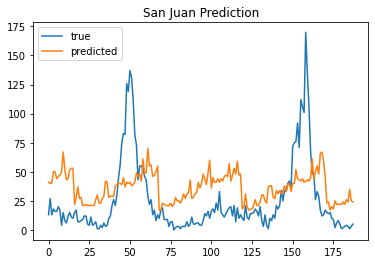

In [0]:
plt.plot(y_true, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('San Juan Prediction')

In [0]:
X_train = train_iq.drop(labels=['total_cases'], axis=1)
y_train = train_iq['total_cases']
X_test = test_iq.drop(labels=['total_cases'], axis=1)
y_test = test_iq['total_cases']

In [0]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [0]:
scores = ["explained_variance" , "neg_mean_absolute_error" ,"neg_mean_squared_error" ,"r2"]
model = MLPRegressor(max_iter=10000)
parameters = {'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, parameters, cv=TimeSeriesSplit(n_splits=5),
             scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        print()
    
    y_true, y_pred = y_test, clf.predict(X_test).astype(int)
    
    
    print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))
    print("-------------------------------------------------------")
    print()

# Tuning hyper-parameters for explained_variance

Best parameters set found on development set:

{'hidden_layer_sizes': (20, 30)}

Grid scores on development set:

-16.862 (+/-66.952) for {'hidden_layer_sizes': (100,)}

-0.693 (+/-1.691) for {'hidden_layer_sizes': (20, 30)}

-1.322 (+/-3.720) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 24.500000
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13, 13)}

Grid scores on development set:

-18.810 (+/-43.259) for {'hidden_layer_sizes': (100,)}

-24.768 (+/-43.334) for {'hidden_layer_sizes': (20, 30)}

-8.226 (+/-8.901) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 21.281915
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13

In [0]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 20.074468


Text(0.5, 1.0, 'Iquitos Prediction')

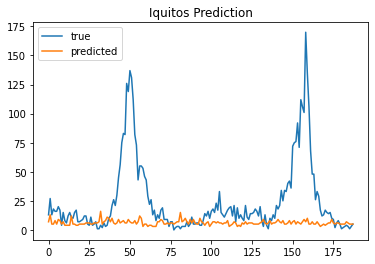

In [0]:
plt.plot(y_true, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('Iquitos Prediction')

In [0]:
X_sj_test = pd.read_csv('X_sj_test.csv')
X_iq_test = pd.read_csv('X_iq_test.csv')

In [0]:
X_train = train_sj.append(test_sj, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_sj_test

In [0]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype(int)

In [0]:
sub_df_sj = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_sj.insert(0, 'city', 'sj')
sub_df_sj.insert(1, 'year', X_test['year'])
sub_df_sj.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_sj

,city,year,weekofyear,total_cases
0,sj,2008,18,26
1,sj,2008,19,26
2,sj,2008,20,24
3,sj,2008,21,25
4,sj,2008,22,22
...,...,...,...,...
255,sj,2013,13,18
256,sj,2013,14,36
257,sj,2013,15,18
258,sj,2013,16,18


In [0]:
X_train = train_iq.append(test_iq, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_iq_test

In [0]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype(int)

In [0]:
sub_df_iq = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_iq.insert(0, 'city', 'iq')
sub_df_iq.insert(1, 'year', X_test['year'])
sub_df_iq.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_iq

,city,year,weekofyear,total_cases
0,iq,2010,26,19
1,iq,2010,27,20
2,iq,2010,28,19
3,iq,2010,29,20
4,iq,2010,30,20
...,...,...,...,...
151,iq,2013,22,20
152,iq,2013,23,19
153,iq,2013,24,19
154,iq,2013,25,20


In [0]:
sub = sub_df_sj.append(sub_df_iq, ignore_index=True)
sub.to_csv('Submission.csv', index = False)

In [0]:
X_train = train_sj.append(test_sj, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_sj_test

pca = PCA(n_components=5)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_pred = np.abs(clf.predict(X_test_pca)).astype(int)

sub_df_sj = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_sj.insert(0, 'city', 'sj')
sub_df_sj.insert(1, 'year', X_test['year'])
sub_df_sj.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_sj

,city,year,weekofyear,total_cases
0,sj,2008,18,17
1,sj,2008,19,4
2,sj,2008,20,9
3,sj,2008,21,10
4,sj,2008,22,5
...,...,...,...,...
255,sj,2013,13,11
256,sj,2013,14,31
257,sj,2013,15,5
258,sj,2013,16,1


In [0]:
X_train = train_iq.append(test_iq, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_iq_test

pca = PCA(n_components=5)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_pred = np.abs(clf.predict(X_test_pca)).astype(int)

sub_df_iq = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_iq.insert(0, 'city', 'iq')
sub_df_iq.insert(1, 'year', X_test['year'])
sub_df_iq.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_iq

,city,year,weekofyear,total_cases
0,iq,2010,26,4
1,iq,2010,27,4
2,iq,2010,28,3
3,iq,2010,29,3
4,iq,2010,30,7
...,...,...,...,...
151,iq,2013,22,3
152,iq,2013,23,2
153,iq,2013,24,1
154,iq,2013,25,4


##KNN/DT/SVM/NB/adaboost/Bagging/ensemble 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
training_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_features_train.csv')
testing_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_features_test.csv')

In [0]:
training_features_sj = training_features[training_features['city'] == 'sj'].drop('city', 1)
training_features_iq = training_features[training_features['city'] == 'iq'].drop('city', 1)
testing_features_sj = testing_features[testing_features['city'] == 'sj'].drop('city', 1)
testing_features_iq = testing_features[testing_features['city'] == 'iq'].drop('city', 1)

In [0]:
training_label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project ai/dengue_labels_train.csv')
training_label_iq = training_label[training_label['city'] == 'iq'].drop('city', 1)

In [0]:
train_iq=pd.merge(training_features_iq, training_label_iq, on=["year","weekofyear"])

In [0]:
training_label_sj = training_label[training_label['city'] == 'sj'].drop('city', 1)

In [0]:
train_sj=pd.merge(training_features_sj, training_label_sj, on=["year","weekofyear"])

In [0]:
corr_iq = train_iq.corr()
corr_sj = train_sj.corr()
coort_iq=testing_features_iq.corr()
coort_sj=testing_features_sj.corr()

In [0]:
# Select upper triangle of correlation matrix
corr_upper_iq = corr_iq.where(np.triu(np.ones(corr_iq.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop_iq = [column for column in corr_upper_iq.columns if any(corr_upper_iq[column] > 0.90) or any(corr_upper_iq[column] < -0.90)]
to_drop_iq

In [0]:
# Select upper triangle of correlation matrix
corrt_upper_iq = coort_iq.where(np.triu(np.ones(coort_iq.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop_iqt = [column for column in corrt_upper_iq.columns if any(corrt_upper_iq[column] > 0.90) or any(corrt_upper_iq[column] < -0.90)]
to_drop_iqt

In [0]:
corr_upper_sj = corr_sj.where(np.triu(np.ones(corr_sj.shape), k=1).astype(np.bool))
to_drop_sj = [column for column in corr_upper_sj.columns if any(corr_upper_sj[column] > 0.95) or any(corr_upper_iq[column] < -0.95)]
to_drop_sj

In [0]:
train_iq.drop(to_drop_iq, axis=1, inplace=True)
train_sj.drop(to_drop_sj, axis=1, inplace=True)

In [0]:
train_iq.drop(['week_start_date'], axis=1, inplace=True)

In [0]:
testing_features_iq.drop(['week_start_date'], axis=1, inplace=True)

In [0]:
train_sj.drop(['week_start_date'], axis=1, inplace=True)

In [0]:
testing_features_sj.drop(['week_start_date'], axis=1, inplace=True)

In [0]:
train_iq[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15
train_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15

testing_features_iq[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15
testing_features_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
            'reanalysis_min_air_temp_k']] -= 273.15

In [0]:
train_iq['ndvi'] = train_iq[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)
train_iq.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [0]:
testing_features_iq['ndvi'] = testing_features_iq[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)
testing_features_iq.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [0]:
train_sj['ndvi_n'] = train_sj[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
train_sj['ndvi_s'] = train_sj[['ndvi_se', 'ndvi_sw']].mean(axis=1)
train_sj.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [0]:
testing_features_sj['ndvi_n'] = testing_features_sj[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
testing_features_sj['ndvi_s'] = testing_features_sj[['ndvi_se', 'ndvi_sw']].mean(axis=1)
testing_features_sj.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [0]:
train_sj['reanalysis_temp'] = train_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
                                              'reanalysis_min_air_temp_k']].mean(axis=1)

In [0]:
testing_features_sj['reanalysis_temp'] = testing_features_sj[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
                                              'reanalysis_min_air_temp_k']].mean(axis=1)

In [0]:
testing_features_sj.drop(['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'],
                 axis=1, inplace=True)

In [0]:
train_sj.drop(['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'],
                 axis=1, inplace=True)

In [0]:
train_iq['station_temp'] =train_iq[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].interpolate().mean(axis=1)
train_iq.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)

In [0]:
testing_features_iq['station_temp'] =testing_features_iq[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].interpolate().mean(axis=1)
testing_features_iq.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 
                          'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)

In [0]:
train_sj['station_temp'] = train_sj[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].interpolate().mean(axis=1)

In [0]:
train_sj.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)


In [0]:
testing_features_sj['station_temp'] = testing_features_sj[
    ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].interpolate().mean(axis=1)

In [0]:
testing_features_sj.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c'], axis=1, inplace=True)
testing_features_sj.shape

In [0]:
train_iq=train_iq.fillna(method = 'ffill')
testing_features_iq=testing_features_iq.fillna(method = 'ffill')
testing_features_sj=testing_features_sj.fillna(method = 'ffill')
train_sj=train_sj.fillna(method = 'ffill')
y=train_iq['total_cases']
x=train_iq.drop(['total_cases'],axis=1)
x_test=testing_features_iq
testing_features_iq.drop(['reanalysis_avg_temp_k','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg'], axis=1, inplace=True)
x.shape,x_test.shape
x.columns,x_test.columns
x_test.shape
y_sj=train_sj['total_cases']
x_sj=train_sj.drop(['total_cases'],axis=1)
x_test_sj=testing_features_sj
x_test_sj.drop(['reanalysis_avg_temp_k','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg'], axis=1, inplace=True)
x_sj.shape,x_test_sj.shape

**KNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
#KNN_iq
model=KNeighborsClassifier(n_neighbors = 3)
model.fit(x,y)
prediction3=model.predict(x_test)
city='iq'
year=testing_features_iq['year']
weekofyear=testing_features_iq['weekofyear']
total_cases=prediction3
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/KNN_iq.csv', index=False)
#KNN_sj
model=KNeighborsClassifier(n_neighbors = 3)
model.fit(x_sj,y_sj)
prediction33=model.predict(x_test_sj)
city='sj'
year=testing_features_sj['year']
weekofyear=testing_features_sj['weekofyear']
total_cases=prediction33
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/KNN_sj.csv', index=False)

**NB**

In [0]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)

In [0]:
#NB_iq
model=GaussianNB()
model.fit(x,y)
prediction3=model.predict(x_test)
city='iq'
year=testing_features_iq['year']
weekofyear=testing_features_iq['weekofyear']
total_cases=prediction3
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/NB_iq.csv', index=False)
#NB_sj
model=GaussianNB()
model.fit(x_sj,y_sj)
prediction33=model.predict(x_test_sj)
city='sj'
year=testing_features_sj['year']
weekofyear=testing_features_sj['weekofyear']
total_cases=prediction33
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/NB_sj.csv', index=False)

**SVM**

In [0]:
#svm.poly_iq
model=svm.SVC(kernel='poly', degree=3)
model.fit(x,y)
prediction3=model.predict(x_test)
city='iq'
year=testing_features_iq['year']
weekofyear=testing_features_iq['weekofyear']
total_cases=prediction3
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/svm_iq.csv', index=False)
#svm.poly_sj
model=svm.SVC(kernel='poly', degree=3)
model.fit(x_sj,y_sj)
prediction33=model.predict(x_test_sj)
city='sj'
year=testing_features_sj['year']
weekofyear=testing_features_sj['weekofyear']
total_cases=prediction33
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/svm_sj.csv', index=False)

**DT**

In [0]:
#DT_iq
model=DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
model.fit(x,y)
prediction3=model.predict(x_test)
city='iq'
year=testing_features_iq['year']
weekofyear=testing_features_iq['weekofyear']
total_cases=prediction3
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/DT_iq.csv', index=False)
#DT_sj
model=DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
model.fit(x_sj,y_sj)
prediction33=model.predict(x_test_sj)
city='sj'
year=testing_features_sj['year']
weekofyear=testing_features_sj['weekofyear']
total_cases=prediction33
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/DT_sj.csv', index=False)

**BaggingClassifier**

In [0]:
#DT_iq
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(x,y)
prediction3=model.predict(x_test)
city='iq'
year=testing_features_iq['year']
weekofyear=testing_features_iq['weekofyear']
total_cases=prediction3
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/bagging_iq.csv', index=False)
#DT_sj
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(x_sj,y_sj)
prediction33=model.predict(x_test_sj)
city='sj'
year=testing_features_sj['year']
weekofyear=testing_features_sj['weekofyear']
total_cases=prediction33
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/bagging_sj.csv', index=False)

**Adaboost**

In [0]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(x,y)
r=gd.predict(x_test)
city='iq'
year=testing_features_iq['year']
weekofyear=testing_features_iq['weekofyear']
total_cases=r
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/adabos_iq.csv', index=False)
#adaboost
from sklearn.ensemble import AdaBoostClassifier
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(x_sj,y_sj)
rr=gd.predict(x_test_sj)
city='sj'
year=testing_features_sj['year']
weekofyear=testing_features_sj['weekofyear']
total_cases=rr
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('/content/drive/My Drive/Colab Notebooks/project ai/adabos_sj.csv', index=False)

**ensemble (DF)**

In [0]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=100)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('DT',DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)),
                                              ('nb',GaussianNB())
                                              
                                             ], 
                       voting='soft').fit(x,y)
vop=ensemble_lin_rbf.predict(x_test)
city='iq'
year=testing_features_iq['year']
weekofyear=testing_features_iq['weekofyear']
total_cases=vop
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})

df.to_csv('ensable_iq.csv', index=False)
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf1=VotingClassifier(estimators=[('RFor',RandomForestClassifier(n_estimators=500,random_state=100)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('DT',DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)),
                                              ('nb',GaussianNB())

                                             ], 
                       voting='soft').fit(x_sj,y_sj)
vop_sj=ensemble_lin_rbf1.predict(x_test_sj)
city='sj'
year=testing_features_sj['year']
weekofyear=testing_features_sj['weekofyear']
total_cases=vop_sj
df = pd.DataFrame({'city': city, 'year':year,'weekofyear':weekofyear,'total_cases':total_cases})
df.to_csv('sjjjjjj.csv', index=False)

## Poisson Regression and NegativeBinomial model




In [0]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
train_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_labels_train.csv',
                           index_col=[0,1,2])

In [0]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [0]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [0]:
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
sj_train_features=sj_train_features.interpolate()
iq_train_features=iq_train_features.interpolate()

In [0]:

pd.isnull(sj_train_features).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

In [0]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6880033a20>]],
      dtype=object)

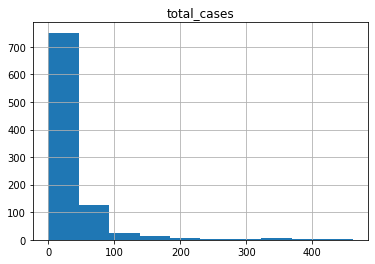

In [0]:
sj_train_labels.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f687ff53c18>]],
      dtype=object)

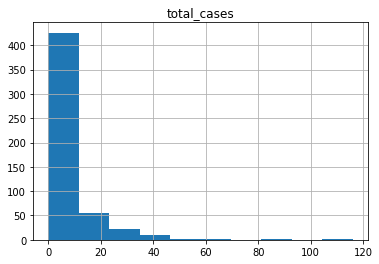

In [0]:
iq_train_labels.hist()

In [0]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [0]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

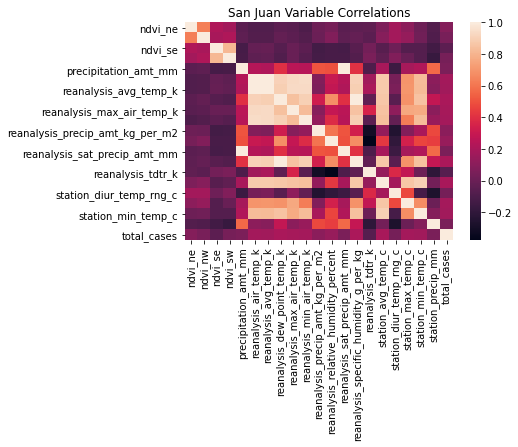

In [0]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

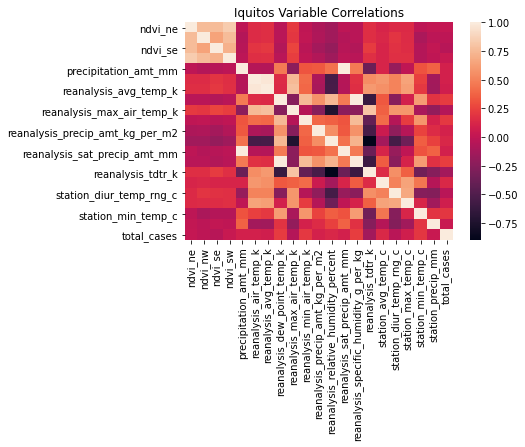

In [0]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

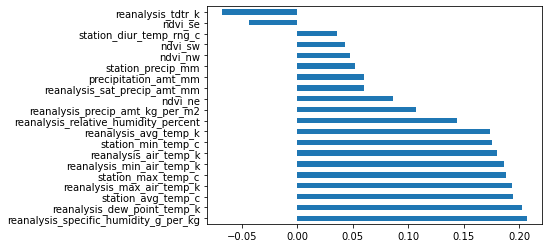

In [0]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

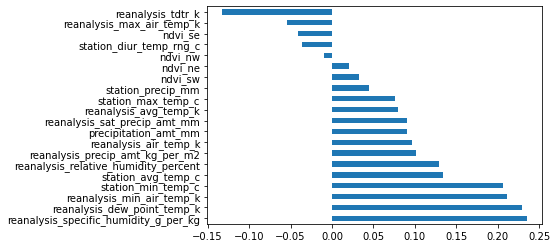

In [0]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [0]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df=df.interpolate()

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

In [0]:
sj_train, iq_train = preprocess_data('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_features_train.csv',
                                    labels_path="/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_labels_train.csv")

In [0]:
#train_test
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [0]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  22.095588235294116
best alpha =  1e-08
best score =  6.466666666666667


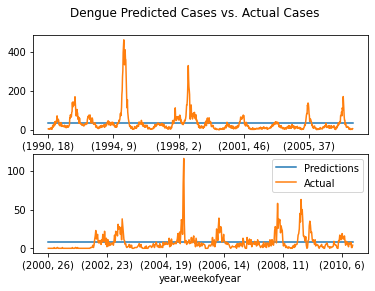

In [0]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [0]:
sj_test, iq_test = preprocess_data('/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/dengue_features_test.csv')

sj_predictions = sj_best_model.predict(sj_test).astype(int)
iq_predictions = iq_best_model.predict(iq_test).astype(int)

submission = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("/content/drive/My Drive/Colab Notebooks/project AI (Dengu)/submissionN.csv")

# **Random Forest (RF)**

In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

train = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")
test = pd.read_csv("dengue_features_test.csv")

train_target = train_labels['total_cases']

test_city = test['city']
test_year = test['year']
test_weekofyear = test['weekofyear']

df = train.append(test, ignore_index = True)
cats = []
for col in df.columns.values:
    if df[col].dtype == 'object':
        cats.append(col)
df_cat = df[cats]
df_cont = df.drop(cats, axis=1)
for col in df_cont.columns.values:
    #median values subsitituted for missing values
    df_cont[col] = df_cont[col].fillna(df[col].median())

#the week_start_date is not necessary as the week and year variables are already available
df_cat = df_cat.drop(['week_start_date'], axis = 1)

df_cat = pd.get_dummies(df_cat)

df = df_cont.join(df_cat)

train = df.iloc[0:train.shape[0]]
test = df.iloc[train.shape[0]:]
    
scorer = make_scorer(mean_absolute_error, False)
    
randForestModel = RandomForestRegressor(n_estimators=100, random_state=8)
crossValMean = np.sqrt(-cross_val_score(estimator=randForestModel, X=train, y=np.ravel(train_target), cv=10, scoring = scorer)).mean()
crossValSTD = np.sqrt(-cross_val_score(estimator=randForestModel, X=train, y=np.ravel(train_target), cv=10, scoring = scorer)).std()

randForestModel.fit(train, np.ravel(train_target))

predictions = randForestModel.predict(test)

predictions = predictions.astype(int)

submission = pd.DataFrame(predictions, columns=["total_cases"])

submission.insert(0, 'city', test_city)
submission.insert(1, 'year', test_year)
submission.insert(2, 'weekofyear', test_weekofyear)
submission.reset_index()
submission.to_csv('Submission.csv', index = False)